<font color='lime'>

# Clustering

</font> 

<font color='yellow'>

## 1. Model Training and Parameter Selection

</font> 

<font color='orange'>

### Import necessary libraries

</font> 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

<font color='orange'>

### Data preprocessing

</font> 

In [2]:
data = pd.read_csv('data/spotify_songs_cleaned.csv')

# Selecting relevant features
features = data[['track_popularity', 'danceability', 'energy', 'key', 'loudness',
                 'mode', 'speechiness', 'acousticness', 'instrumentalness',
                 'liveness', 'valence', 'tempo', 'duration_ms']]

# Check for missing values
print("Missing values in each column:\n", features.isnull().sum())

# Normalize the features if not already normalized
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

Missing values in each column:
 track_popularity    0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64


<font color='orange'>

### K-means Clustering

</font> 

c:\Users\alexe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alexe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alexe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\alexe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

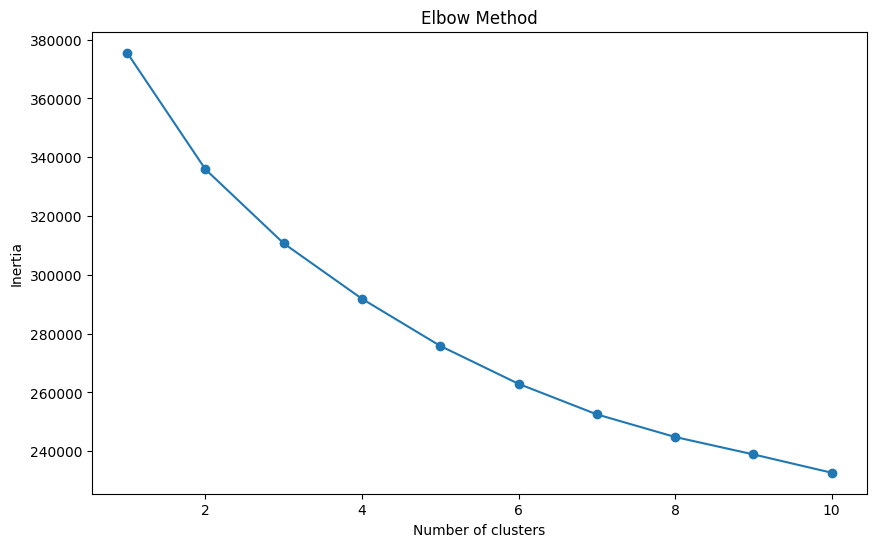

c:\Users\alexe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-means Silhouette Score:  0.09487736446862288


In [3]:
# Elbow method to find the optimal number of clusters (k)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') # how far the data points are from their cluster centers
plt.show()

# Choose the number of clusters based on the elbow method
n_clusters_kmeans = 3
kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=42)
kmeans_clusters = kmeans.fit_predict(features_scaled)

# Silhouette Score for K-means
silhouette_avg_kmeans = silhouette_score(features_scaled, kmeans_clusters)
print("K-means Silhouette Score: ", silhouette_avg_kmeans)

<font color='orange'>

### DBSCAN Clustering

A way of grouping points (or data) so that similar points are in the same group and dissimilar points are in different groups

</font> 

In [9]:
# Choose eps and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(features_scaled)

# Silhouette Score for DBSCAN (if more than one cluster is formed)
if len(set(dbscan_clusters)) > 1:
    silhouette_avg_dbscan = silhouette_score(features_scaled, dbscan_clusters)
    print("DBSCAN Silhouette Score: ", silhouette_avg_dbscan)
else:
    print("DBSCAN formed a single cluster or noise.")

DBSCAN Silhouette Score:  -0.40085077548277936


<font color='orange'>

### Hierarchical Clustering

</font> 

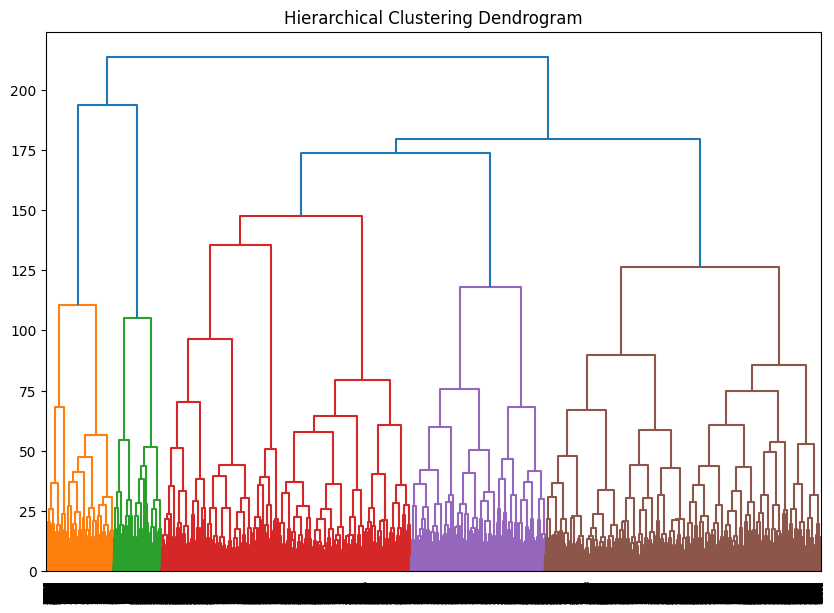

Hierarchical Clustering Silhouette Score:  0.15135620814008566


In [5]:
from scipy.cluster.hierarchy import fcluster

# Using the 'ward' linkage method # focuses on minimizing the sum of squared differences within all clusters
linked = linkage(features_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Choose the number of clusters based on the dendrogram
n_clusters_hierarchical = 3
hierarchical_clusters = fcluster(linked, n_clusters_hierarchical, criterion='maxclust')

# Silhouette Score for Hierarchical Clustering
silhouette_avg_hierarchical = silhouette_score(features_scaled, hierarchical_clusters)
print("Hierarchical Clustering Silhouette Score: ", silhouette_avg_hierarchical)

<font color='yellow'>

## 2. Visualization of predicted values

</font> 

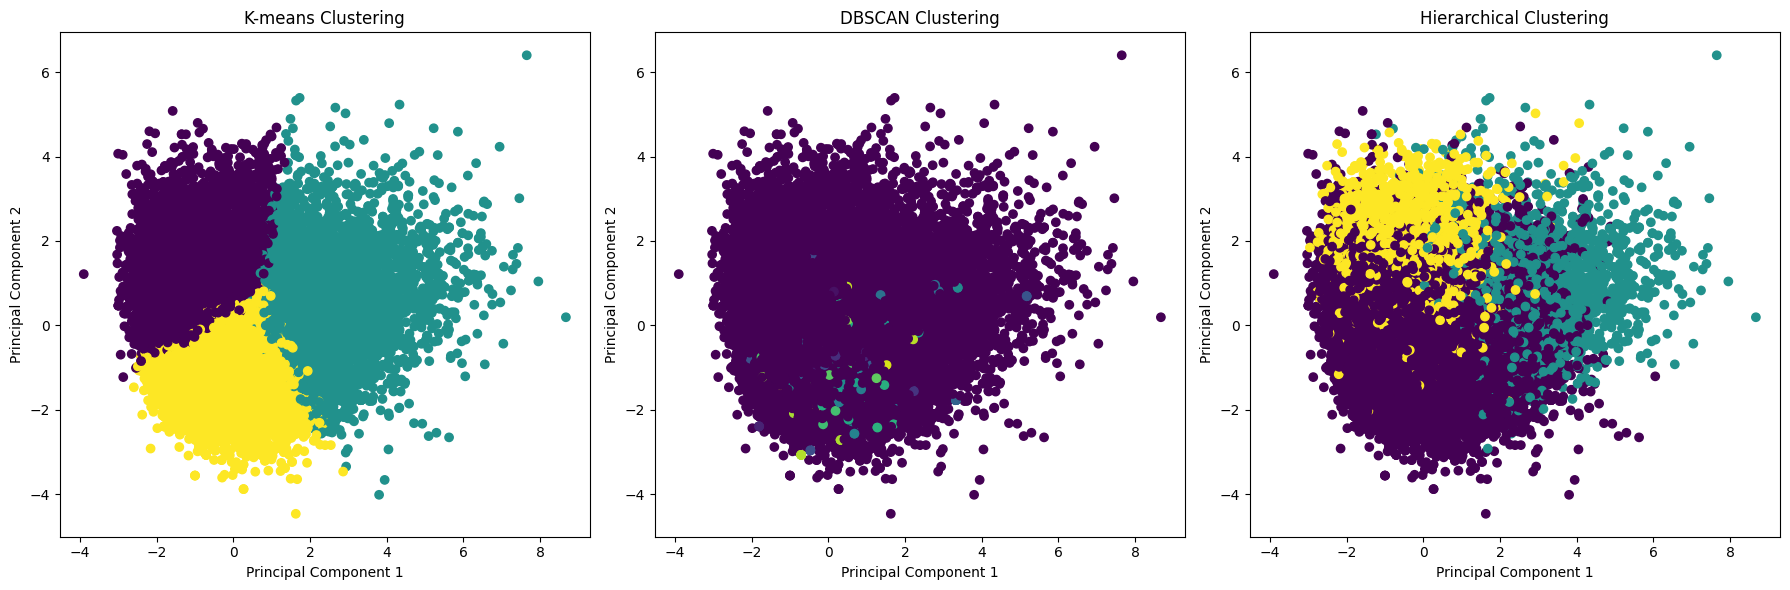

In [6]:
# Dimensionality Reduction for Visualization (using PCA)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Plot the clusters for each method
plt.figure(figsize=(18, 6))

# K-means clusters
plt.subplot(1, 3, 1)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans_clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering')

# DBSCAN clusters
plt.subplot(1, 3, 2)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=dbscan_clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering')

# Hierarchical clusters
plt.subplot(1, 3, 3)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=hierarchical_clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hierarchical Clustering')

plt.tight_layout()
plt.show()